# WordCloud

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from projetpython import text_treatment as tt
from random import shuffle
from functools import reduce
from nltk.probability import FreqDist
from wordcloud import WordCloud

In [2]:
data = pd.read_csv("scrapped.csv", delimiter=';' , encoding='utf-8',usecols={"titres","urls","informations"},) # Change to delimiter=';' , encoding='utf-8' for final version
data.head()

,titres,urls,informations
0,St Jean cannelloni ricotta épinard bio 250g,https://www.auchan.fr/st-jean-cannelloni-ricot...,"Ingrédients: Farce 65%: épinards* 17.5%, RICOT..."
1,Rana raviolis aux petits pois bio 250g,https://www.auchan.fr/rana-raviolis-aux-petits...,Ingrédients: Ingrédients : Farce 58%: petits p...
2,Auchan bio légumes pour couscous 680g,https://www.auchan.fr/auchan-bio-legumes-pour-...,"Ingrédients: Légumes* 50% (carottes* 11,8%, po..."
3,Le Traiteur taboulé aux légumes bio 250g,https://www.auchan.fr/le-traiteur-taboule-aux-...,Bio: Oui. Ingrédients: Semoule de blé dur réhy...
4,La Pastilla feuille de brick x10 +2gt -200g,https://www.auchan.fr/la-pastilla-feuille-de-b...,Ingrédients : farine de blé (gluten) et lécith...


In [3]:
def regex(string=""):
    res = string.lower()
    res = re.sub("(ingrédients|\\xa0|\d+,?\d+%|[dl]['´]|\.+|[\*:\(\)\.\d%&-])" , 
            ' ',res)    
    patterns = {"ommesdeter" : "(ommes de ter)|(omme de ter)" ,
                "huilede" : "huile de " ,
                "huiled" : "huile d'" ,
                "a" : "[âäàá]" ,
                "e" : "[éèêë]" ,
                "i" : "[íìîï]" ,
                "o" : "[óòôö]" ,
                "u" : "[úùûü]" ,
                "c" : "ç" ,
                "n" : "ñ" ,
                "," : " ," ,
                "oe": "œ"
                }
    for key in patterns:
       res = re.sub(patterns[key] , key , res)
    return res
data.informations = data.informations.apply(lambda x : regex(x))
data.head()

,titres,urls,informations
0,St Jean cannelloni ricotta épinard bio 250g,https://www.auchan.fr/st-jean-cannelloni-ricot...,"farce epinards , ricotta , cha..."
1,Rana raviolis aux petits pois bio 250g,https://www.auchan.fr/rana-raviolis-aux-petits...,"farce petits pois , chapelure far..."
2,Auchan bio légumes pour couscous 680g,https://www.auchan.fr/auchan-bio-legumes-pour-...,"legumes carottes , pois chiches rehyd..."
3,Le Traiteur taboulé aux légumes bio 250g,https://www.auchan.fr/le-traiteur-taboule-aux-...,"bio oui semoule de ble dur rehydratee , ..."
4,La Pastilla feuille de brick x10 +2gt -200g,https://www.auchan.fr/la-pastilla-feuille-de-b...,farine de ble gluten et lecithine de soj...


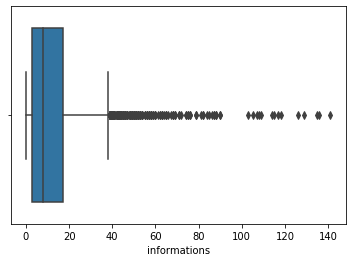

In [4]:

frequence = data["informations"].str.count(",")
frequence.describe()
sns.boxplot(frequence)

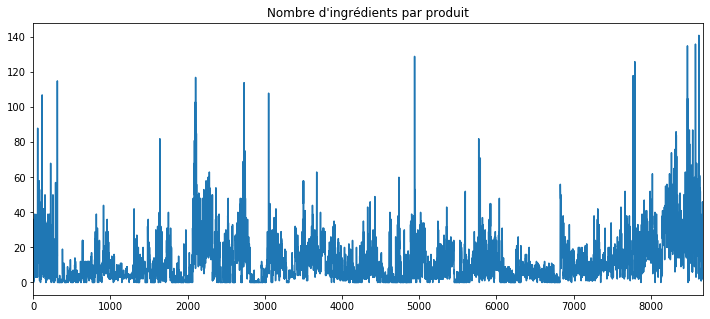

In [5]:
frequence.plot(title="Nombre d'ingrédients par produit", figsize=(12, 5))

In [6]:
data.informations = data.informations.apply(lambda x : tt.filter_stropwords(tt.regex(x)))
data.head()

,titres,urls,informations
0,St Jean cannelloni ricotta épinard bio 250g,https://www.auchan.fr/st-jean-cannelloni-ricot...,"[farce, epinard, ricotta, chapelure, ble, emme..."
1,Rana raviolis aux petits pois bio 250g,https://www.auchan.fr/rana-raviolis-aux-petits...,"[farce, petit, poi, chapelure, ble, sel, levur..."
2,Auchan bio légumes pour couscous 680g,https://www.auchan.fr/auchan-bio-legumes-pour-...,"[legume, carotte, poi, chiche, rehydrates, nav..."
3,Le Traiteur taboulé aux légumes bio 250g,https://www.auchan.fr/le-traiteur-taboule-aux-...,"[bio, oui, ble, rehydratee, poivron, vert, tom..."
4,La Pastilla feuille de brick x10 +2gt -200g,https://www.auchan.fr/la-pastilla-feuille-de-b...,"[ble, gluten, lecithine, soja, soja]"


In [7]:
wordsFiltered = reduce(lambda a, b : a + b , data.informations)
shuffle(wordsFiltered)
print(wordsFiltered[:50])

['carotte', 'calcium', 'fonction', 'lactiques', 'agriculture', 'lait', 'sucre', 'carboxymethylcellulose', 'jaune', 'sel', 'poisson', 'verre', 'hors', 'francaise', 'cacao', 'glucose', 'jambon', 'cuivre', 'cuite', 'seigle', 'poivron', 'noir', 'soja', 'tomates', 'vou', 'poid', 'sucre', 'citrate', 'tapioca', 'cacao', 'vinaigre', 'lait', 'sel', 'poid', 'sel', 'sel', 'sucre', 'porc', 'prepare', 'jambon', 'emmental', 'porc', 'arachide', 'lait', 'tournesol', 'soja', 'poi', 'beta', 'mungo', 'morille']


In [8]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=tt.stopwords_fr,
        max_words=25,
        max_font_size=40, 
        scale=5,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

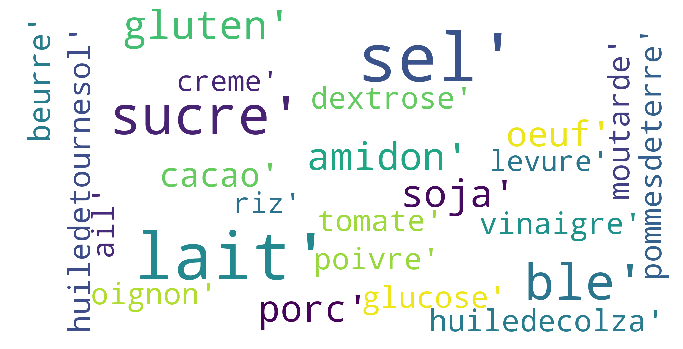

In [9]:
show_wordcloud(wordsFiltered)

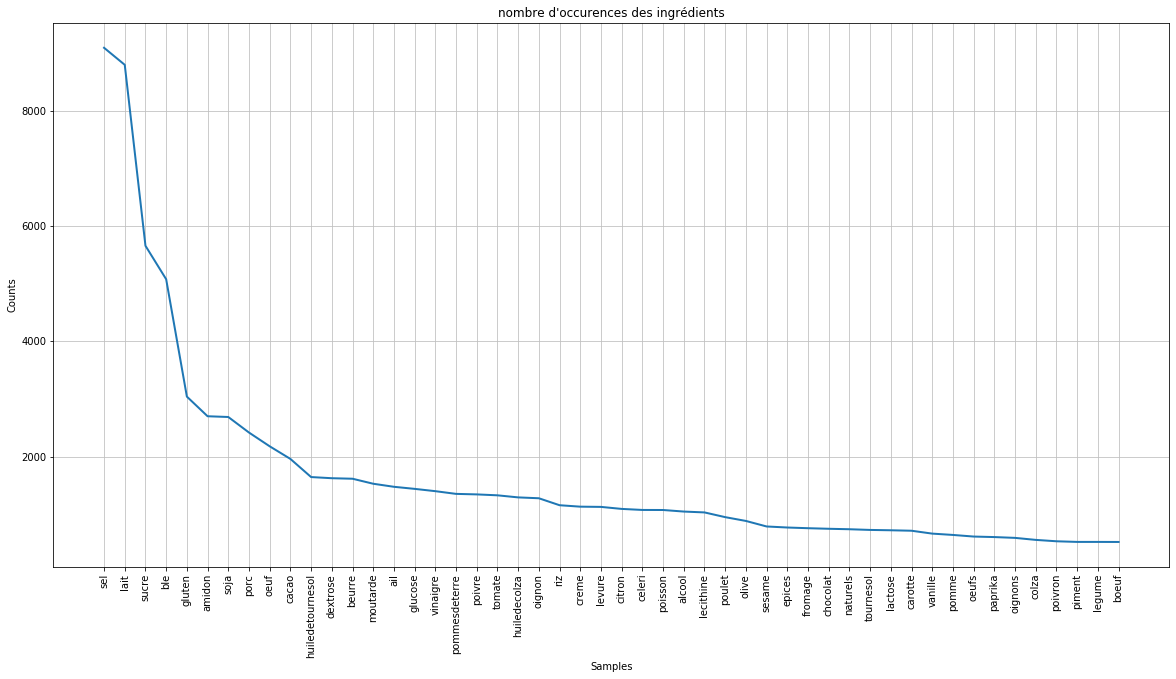

In [10]:
#fonction pour voir la fréquence des mots pour analyse sentiments par la suite

fdist = FreqDist(wordsFiltered)
fig = plt.figure(1, figsize=(20, 10))
fdist.plot(50, cumulative=False,title="nombre d'occurences des ingrédients")